In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import scipy.stats as st
import numpy as np
import requests

In [2]:
file_path = "Resources\\MoviesOnStreamingPlatforms_updated.csv"

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## Data Cleaning

In [3]:
df.drop(columns=["Rotten Tomatoes","Directors","Type","Unnamed: 0"], inplace=True)

df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
complete_df = df.loc[~((df['IMDb'].isnull() )|(df['Genres'].isnull())|(df['Language'].isnull())|(df["Country"].isnull())|(df['Age'].isnull()))]

complete_df.shape

(7192, 13)

In [5]:
platforms = complete_df.copy()
#We'll use this later...

complete_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


## Let's first see the total movies in each platform's collection.

In [6]:
complete_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [7]:
completero_df = pd.melt(complete_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Genres', 'Country', 'Language', 'Runtime'], 
                      value_vars= ['Netflix', 'Hulu', 'Prime Video','Disney+'], var_name = "Service")

#completero_df.head()

In [8]:
completero_df = completero_df[completero_df["value"]==1]

completero_df.drop(columns=["value"], inplace=True)

completero_df

#Now we have a new column called "Service" that shows us on what platform each movie is. 
#If a movie is on more than one platform, there will be more than one row for that movie.

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Service
0,1,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix
1,2,The Matrix,1999,18+,8.7,"Action,Sci-Fi",United States,English,136.0,Netflix
2,3,Avengers: Infinity War,2018,13+,8.5,"Action,Adventure,Sci-Fi",United States,English,149.0,Netflix
3,4,Back to the Future,1985,7+,8.5,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix
...,...,...,...,...,...,...,...,...,...,...
28763,16727,Richie Rich's Christmas Wish,1998,all,4.1,"Comedy,Family",United States,English,84.0,Disney+
28764,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,"Adventure,Family",United States,English,77.0,Disney+
28765,16738,The Bears and I,1974,all,6.2,"Drama,Family",United States,English,89.0,Disney+
28766,16739,Whispers: An Elephant's Tale,2000,all,5.0,"Adventure,Family",United States,English,72.0,Disney+


In [9]:
netflix_movies = len(completero_df[completero_df["Service"]=="Netflix"])
hulu_movies = len(completero_df[completero_df["Service"]=="Hulu"])
prime_movies = len(completero_df[completero_df["Service"]=="Prime Video"])
disney_movies = len(completero_df[completero_df["Service"]=="Disney+"])


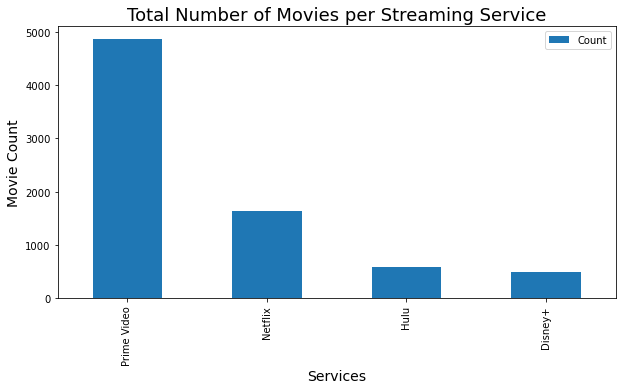

,Service,Count
0,Prime Video,4865
1,Netflix,1641
2,Hulu,578
3,Disney+,497


In [10]:
count = [netflix_movies, hulu_movies, prime_movies, disney_movies]
labels_count = ["Netflix", "Hulu", "Prime Video", "Disney+"]


service_movie_count = pd.DataFrame({"Service" : labels_count, "Count":count }).sort_values(by = "Count", ascending=False)
service_movie_count_plot = service_movie_count.plot.bar(x="Service", y="Count",figsize=(10,5))

v = {"Service" : labels_count, "Count" : count}

countslabel_df = pd.DataFrame(data = v).sort_values(by="Count", ascending=False).reset_index(drop=True)

plt.title("Total Number of Movies per Streaming Service", fontsize= 18)
plt.ylabel("Movie Count", fontsize=14)
plt.xlabel("Services", fontsize=14)
plt.show()

countslabel_df

#### We can see that Prime Video also has the largest selection of movies out of all the platforms. However, quantity is not always equal to quality...

## Next, we'll see which streaming service has the best distribution of IMDb ratings in their movies.

##### We'll do this with a Boxplot

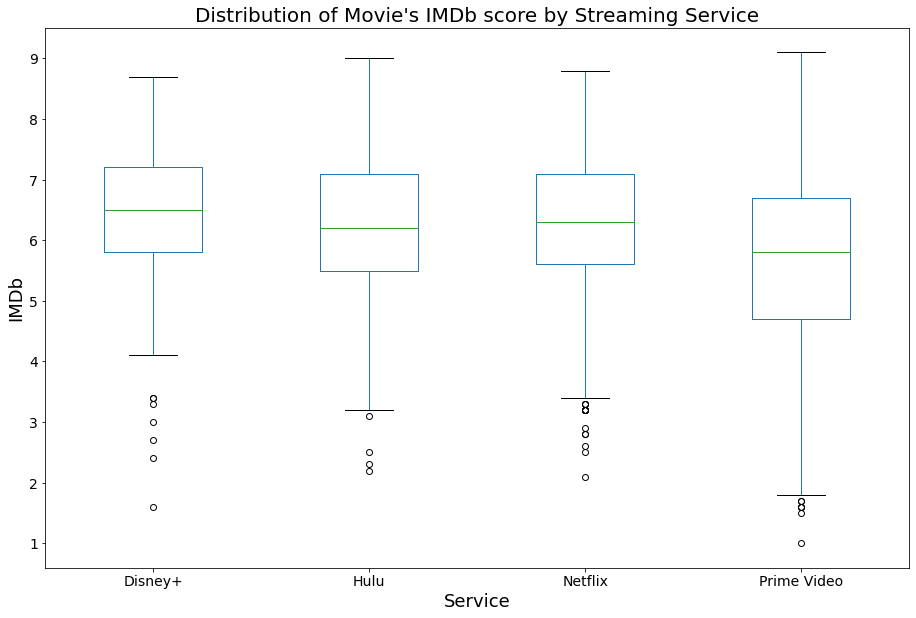

In [11]:
completero_df.boxplot(column = "IMDb", by = "Service",figsize=(15,10))

plt.title("Distribution of Movie's IMDb score by Streaming Service", fontsize=20)
plt.ylabel("IMDb", fontsize=18)
plt.xlabel("Service",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle("")
plt.grid(False)


plt.show()

#### We can see that Disney+ and Netflix have a better IMDb score distribution than the rest of the streaming services.
#### Even if Disney+ has the lowest selection of movies, they have top-rated movies in their collection.

# Now we'll see what countries have the best movies.

In [12]:
import json
import requests
import gmaps

#Google developer API key
from config import g_key

#Configure gmaps
gmaps.configure(api_key=g_key)

In [13]:
#Separate data from Country column and duplicate Country values
xplodecountry_df= complete_df.assign(Country=df.Country.str.split(",")).explode('Country')
xplodecountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller",United States,"English,Japanese,French",148.0
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller",United Kingdom,"English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,"Adventure,Family",United States,English,72.0


In [14]:
#Sorting data by descendign order in IMDb rating column and ascending Country to guarantee different results than USA
sortcountry_df = xplodecountry_df.sort_values(by =['IMDb','Country'], ascending=[False,True])
sortcountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",United Kingdom,"Bosnian,English",56.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United States,"English,Mandarin",152.0
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",United States,Italian,84.0
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0


In [15]:
#Get Unique Values of a Column with drop_duplicates() for a specific column Title
dropcountry_df= sortcountry_df.drop_duplicates(subset=['Title'])
dropcountry_df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0
4829,4830,The Mountain II,2016,all,8.9,0,0,1,0,"Action,Drama,War",Turkey,Turkish,135.0
7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,Documentary,Australia,English,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0


## Like before, we'll add the service column

In [16]:
dropcountry_df["Total Services"] = dropcountry_df["Netflix"]+dropcountry_df["Hulu"]+dropcountry_df["Prime Video"]+dropcountry_df["Disney+"]

uniquecountry_movies_df = dropcountry_df[dropcountry_df["Total Services"]<2]
print("----------------------------")
print(f"Complete Country adding Total Service column")
print("----------------------------")
uniquecountry_movies_df

----------------------------
Complete Country adding Total Service column
----------------------------


<ipython-input-16-f47e37ca1240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropcountry_df["Total Services"] = dropcountry_df["Netflix"]+dropcountry_df["Hulu"]+dropcountry_df["Prime Video"]+dropcountry_df["Disney+"]


,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Total Services
7491,7492,Finding Family,2013,13+,9.1,0,0,1,0,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0,1
3560,3561,The Dark Knight,2008,13+,9.0,0,1,0,0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0,1
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,0,0,1,0,"Documentary,Music",Canada,English,102.0,1
4829,4830,The Mountain II,2016,all,8.9,0,0,1,0,"Action,Drama,War",Turkey,Turkish,135.0,1
7643,7644,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,Documentary,Australia,English,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,15736,The Legend of the Titanic,1999,all,1.6,0,0,1,0,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0,1
15837,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,0,0,1,0,"Animation,Family",United States,English,101.0,1
16631,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,0,0,0,1,"Documentary,Music",United States,English,76.0,1
15556,15557,Diamond Dawgs,2009,18+,1.5,0,0,1,0,"Action,Crime,Drama",United States,English,90.0,1


In [17]:
uniquecountry_movies_df = pd.melt(uniquecountry_movies_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Genres', 'Country',
                                                                      'Language', 'Runtime', "Total Services"], 
                      value_vars= ['Netflix', 'Hulu', 'Prime Video','Disney+'], var_name = "Service")

#uniquecountry_movies_df

In [18]:
#COMPLETE DATA FRAME WITH UNIQUE COUNTRY AND SERVICE COLUMNS
uniquecountry_movies_df = uniquecountry_movies_df[uniquecountry_movies_df["value"]==1]

uniquecountry_movies_df.drop(columns=["value"], inplace=True)

uniquecountry_movies_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
6,1,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller",United Kingdom,"English,Japanese,French",148.0,1,Netflix
10,2,The Matrix,1999,18+,8.7,"Action,Sci-Fi",United States,English,136.0,1,Netflix
15,1539,Luciano Mellera: Infantiloide,2018,13+,8.6,Comedy,Argentina,Spanish,66.0,1,Netflix
16,2196,Hikaru Utada Laughter in the Dark Tour 2018,2019,all,8.6,Music,Japan,Japanese,141.0,1,Netflix
26,48,Senna,2010,13+,8.5,"Documentary,Biography,Sport",France,"English,Portuguese,French,Japanese",106.0,1,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
26887,16638,Inspector Gadget 2,2003,all,3.4,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0,1,Disney+
26889,16672,George of the Jungle 2,2003,7+,3.3,"Adventure,Comedy,Family",Australia,English,87.0,1,Disney+
27030,16688,Kazaam,1996,7+,3.0,"Comedy,Family,Fantasy,Musical",United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,"Documentary,Music",United States,English,74.0,1,Disney+


## Creating and info label for the best recent and oldest movies ever, according to IMDb ranking

In [19]:
uniquecountry_movies_df.loc[uniquecountry_movies_df['Year'].idxmax()]

ID                                               284
Title             Crip Camp: A Disability Revolution
Year                                            2020
Age                                              18+
IMDb                                             7.8
Genres                                   Documentary
Country                                United States
Language                                     English
Runtime                                          106
Total Services                                     1
Service                                      Netflix
Name: 325, dtype: object

In [20]:
uniquecountry_movies_df.loc[uniquecountry_movies_df['Year'].idxmin()]

ID                                                        4468
Title                                       A Trip to the Moon
Year                                                      1902
Age                                                        all
IMDb                                                       8.2
Genres            Short,Action,Adventure,Comedy,Fantasy,Sci-Fi
Country                                                 France
Language                                           None,French
Runtime                                                     13
Total Services                                               1
Service                                            Prime Video
Name: 13708, dtype: object

## Getting the oldest and newest movies of all time by rank.

In [21]:
uniquecountry_movies_df[uniquecountry_movies_df['Year']==uniquecountry_movies_df['Year'].max()]
uniquecountry_movies_df.head()

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
6,1,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller",United Kingdom,"English,Japanese,French",148.0,1,Netflix
10,2,The Matrix,1999,18+,8.7,"Action,Sci-Fi",United States,English,136.0,1,Netflix
15,1539,Luciano Mellera: Infantiloide,2018,13+,8.6,Comedy,Argentina,Spanish,66.0,1,Netflix
16,2196,Hikaru Utada Laughter in the Dark Tour 2018,2019,all,8.6,Music,Japan,Japanese,141.0,1,Netflix
26,48,Senna,2010,13+,8.5,"Documentary,Biography,Sport",France,"English,Portuguese,French,Japanese",106.0,1,Netflix


In [22]:
uniquecountry_movies_df[uniquecountry_movies_df['Year']==uniquecountry_movies_df['Year'].min()]

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
13708,4468,A Trip to the Moon,1902,all,8.2,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi",France,"None,French",13.0,1,Prime Video


## Create a unique country movie Data Frame merging unique Services in one column

In [23]:
#Sorting data by descendign order in IMDb rating column and ascending Country 
uniquecountry_movies_df = uniquecountry_movies_df.sort_values(by =['IMDb','Country'], ascending=[False,True])
uniquecountry_movies_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
13622,7492,Finding Family,2013,13+,9.1,"Documentary,Family,History,War",Bosnia and Herzegovina,"Bosnian,English",56.0,1,Prime Video
6812,3561,The Dark Knight,2008,13+,9.0,"Action,Crime,Drama,Thriller",United Kingdom,"English,Mandarin",152.0,1,Hulu
13624,6841,Peter Gabriel: Secret World Live,1993,all,8.9,"Documentary,Music",Canada,English,102.0,1,Prime Video
13625,4830,The Mountain II,2016,all,8.9,"Action,Drama,War",Turkey,Turkish,135.0,1,Prime Video
13626,7644,Machine Gun Preacher Documentary,2014,16+,8.8,Documentary,Australia,English,73.0,1,Prime Video
...,...,...,...,...,...,...,...,...,...,...,...
20428,15736,The Legend of the Titanic,1999,all,1.6,"Animation,Family,Fantasy,Romance",Italy,Italian,84.0,1,Prime Video
20429,15838,Life's a Jungle: Africa's Most Wanted,2012,all,1.6,"Animation,Family",United States,English,101.0,1,Prime Video
27241,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,"Documentary,Music",United States,English,76.0,1,Disney+
20431,15557,Diamond Dawgs,2009,18+,1.5,"Action,Crime,Drama",United States,English,90.0,1,Prime Video


## Calling API key to use Gmaps

## Clean up, replace and update Country names recognizable by Google
#### Replace and update Soviet Union to Russia naming

In [24]:
#First call the DataFrame source, then I created a variable to hold cities
cities_df= uniquecountry_movies_df
uniquecountry_movies_df["Country"].unique()

array(['Bosnia and Herzegovina', 'United Kingdom', 'Canada', 'Turkey',
       'Australia', 'Japan', 'United States', 'India', 'Argentina',
       'Brazil', 'France', 'Syria', 'New Zealand', 'Soviet Union',
       'Switzerland', 'Denmark', 'Germany', 'Austria', 'China', 'Finland',
       'Mexico', 'Spain', 'Belgium', 'Czech Republic', 'Haiti',
       'Hong Kong', 'Kyrgyzstan', 'Peru', 'United Arab Emirates',
       'Bermuda', 'Czechoslovakia', 'Philippines', 'Poland', 'Romania',
       'South Korea', 'Sweden', 'Netherlands', 'Norway', 'Taiwan',
       'Angola', 'Bangladesh', 'Pakistan', 'Italy', 'Thailand', 'Egypt',
       'Hungary', 'Ireland', 'Israel', 'Luxembourg', 'Qatar', 'Russia',
       'Ukraine', 'West Germany', 'Guatemala', 'Afghanistan', 'Malta',
       'South Africa', 'Bulgaria', 'Cambodia', 'Colombia', 'Croatia',
       'Dominican Republic', 'Lebanon', 'Tanzania', 'Nepal', 'Paraguay',
       'Indonesia', 'Chile', 'Iceland', 'Iran', 'Cuba', 'Jamaica',
       'Burkina Faso', '

In [25]:
cities_df["Country"].unique()

array(['Bosnia and Herzegovina', 'United Kingdom', 'Canada', 'Turkey',
       'Australia', 'Japan', 'United States', 'India', 'Argentina',
       'Brazil', 'France', 'Syria', 'New Zealand', 'Soviet Union',
       'Switzerland', 'Denmark', 'Germany', 'Austria', 'China', 'Finland',
       'Mexico', 'Spain', 'Belgium', 'Czech Republic', 'Haiti',
       'Hong Kong', 'Kyrgyzstan', 'Peru', 'United Arab Emirates',
       'Bermuda', 'Czechoslovakia', 'Philippines', 'Poland', 'Romania',
       'South Korea', 'Sweden', 'Netherlands', 'Norway', 'Taiwan',
       'Angola', 'Bangladesh', 'Pakistan', 'Italy', 'Thailand', 'Egypt',
       'Hungary', 'Ireland', 'Israel', 'Luxembourg', 'Qatar', 'Russia',
       'Ukraine', 'West Germany', 'Guatemala', 'Afghanistan', 'Malta',
       'South Africa', 'Bulgaria', 'Cambodia', 'Colombia', 'Croatia',
       'Dominican Republic', 'Lebanon', 'Tanzania', 'Nepal', 'Paraguay',
       'Indonesia', 'Chile', 'Iceland', 'Iran', 'Cuba', 'Jamaica',
       'Burkina Faso', '

In [26]:
#Replacing unexistent countries by existing names
cities_df.replace({'Soviet Union': 'Russia'}, inplace=True)

## Creating cities DataFrame

In [27]:
summarycities_df = cities_df[["Country","Title","IMDb","Year","Service"]]
summarycities_df.head(6)

,Country,Title,IMDb,Year,Service
13622,Bosnia and Herzegovina,Finding Family,9.1,2013,Prime Video
6812,United Kingdom,The Dark Knight,9.0,2008,Hulu
13624,Canada,Peter Gabriel: Secret World Live,8.9,1993,Prime Video
13625,Turkey,The Mountain II,8.9,2016,Prime Video
13626,Australia,Machine Gun Preacher Documentary,8.8,2014,Prime Video
13627,Japan,Memories 677,8.8,2011,Prime Video


## Setting DataFrame to IMDb Top 5 unique countries to be mapped and call their latitude and longitude in order to be found

In [28]:
#Add columns for lat, lng
#We used "" to specify initial entry
summarycities_df["Lat"]= ""
summarycities_df["Lng"]= ""

#Block number of cities to 6
topcities_df= summarycities_df[:6]
topcities_df

<ipython-input-28-1c1470b53937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarycities_df["Lat"]= ""
<ipython-input-28-1c1470b53937>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarycities_df["Lng"]= ""


,Country,Title,IMDb,Year,Service,Lat,Lng
13622,Bosnia and Herzegovina,Finding Family,9.1,2013,Prime Video,,
6812,United Kingdom,The Dark Knight,9.0,2008,Hulu,,
13624,Canada,Peter Gabriel: Secret World Live,8.9,1993,Prime Video,,
13625,Turkey,The Mountain II,8.9,2016,Prime Video,,
13626,Australia,Machine Gun Preacher Documentary,8.8,2014,Prime Video,,
13627,Japan,Memories 677,8.8,2011,Prime Video,,


In [29]:
#create a params dict that will be updated with new city each iteration
params= {"key":g_key}

#Loop through summarycities_df and run a lat/lng search for each city
for index, row in topcities_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    country = row["Country"]
    params["address"]= f"{country}"
    
    
    #make request and print to check 
    country_lat_lng= requests.get(base_url, params=params)
    ##print(country_lat_lng.url)
    
    #convert to json
    country_lat_lng = country_lat_lng.json()
    
    topcities_df.loc[index, "Lat"] = country_lat_lng["results"][0]["geometry"]["location"]["lat"]
    topcities_df.loc[index, "Lng"] = country_lat_lng["results"][0]["geometry"]["location"]["lng"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
topcities_df

,Country,Title,IMDb,Year,Service,Lat,Lng
13622,Bosnia and Herzegovina,Finding Family,9.1,2013,Prime Video,43.9159,17.6791
6812,United Kingdom,The Dark Knight,9.0,2008,Hulu,55.3781,-3.43597
13624,Canada,Peter Gabriel: Secret World Live,8.9,1993,Prime Video,56.1304,-106.347
13625,Turkey,The Mountain II,8.9,2016,Prime Video,38.9637,35.2433
13626,Australia,Machine Gun Preacher Documentary,8.8,2014,Prime Video,-25.2744,133.775
13627,Japan,Memories 677,8.8,2011,Prime Video,36.2048,138.253


## Defining markers and marker titles¶

In [31]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Title</dt><dd>{Title}</dd>
<dt>Service</dt><dd>{Service}</dd>
<dt>IMDb</dt><dd>{IMDb}</dd>
<dt>Year</dt><dd>{Year}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
city_info = [info_box_template.format(**row) for index, row in topcities_df.iterrows()]

#Create a map using coordinates to set markers
marker_locations = topcities_df[["Lat", "Lng"]]

In [32]:
#city_info

In [33]:
#marker_locations

In [34]:
#IMDb = topcities_df["IMDb"].tolist()

## Mapping IMDb Top five movies
#### The IMDb top five ranking movies correspond to different countries as well as different different years. Is interesting to find that the Top ranked movie corresponds to a 1993 Movie from Bosnia Herzegovina

In [35]:
# Add marker layer for Hotel map
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,info_box_content=city_info)

fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Now we'll take a deeper dive into each platform.

In [36]:
uniquecountry_movies_df.loc[uniquecountry_movies_df['Service']=='Disney+']

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,"Action,Adventure,Fantasy,Sci-Fi",United States,English,124.0,1,Disney+
20457,16213,Star Wars: A New Hope,1977,7+,8.6,"Action,Adventure,Fantasy,Sci-Fi",United States,English,121.0,1,Disney+
20464,16215,The Lion King,1994,all,8.5,"Animation,Adventure,Drama,Family,Musical",United Kingdom,"English,Xhosa,Zulu,French,Spanish",118.0,1,Disney+
20472,16442,Newsies: The Broadway Musical,2017,13+,8.5,Musical,United States,English,149.0,1,Disney+
20492,16217,Avengers: Endgame,2019,13+,8.4,"Action,Adventure,Drama,Sci-Fi",United States,"English,Japanese,Xhosa,German",181.0,1,Disney+
...,...,...,...,...,...,...,...,...,...,...,...
26887,16638,Inspector Gadget 2,2003,all,3.4,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0,1,Disney+
26889,16672,George of the Jungle 2,2003,7+,3.3,"Adventure,Comedy,Family",Australia,English,87.0,1,Disney+
27030,16688,Kazaam,1996,7+,3.0,"Comedy,Family,Fantasy,Musical",United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,"Documentary,Music",United States,English,74.0,1,Disney+


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

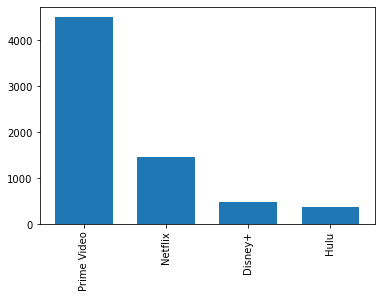

In [37]:
#graphing movie count by service

streaming_service_bio = uniquecountry_movies_df['Service'].value_counts()
x_value = streaming_service_bio.index.values  
y_value= streaming_service_bio.values
plt.xlabel('')


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)

In [38]:
#Make Genre easier to categorize
uniquecountry_movies_df['Genres']= uniquecountry_movies_df['Genres'].str.split(',')
uniquecountry_movies_df = uniquecountry_movies_df.explode('Genres')
uniquecountry_movies_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
13622,7492,Finding Family,2013,13+,9.1,Documentary,Bosnia and Herzegovina,"Bosnian,English",56.0,1,Prime Video
13622,7492,Finding Family,2013,13+,9.1,Family,Bosnia and Herzegovina,"Bosnian,English",56.0,1,Prime Video
13622,7492,Finding Family,2013,13+,9.1,History,Bosnia and Herzegovina,"Bosnian,English",56.0,1,Prime Video
13622,7492,Finding Family,2013,13+,9.1,War,Bosnia and Herzegovina,"Bosnian,English",56.0,1,Prime Video
6812,3561,The Dark Knight,2008,13+,9.0,Action,United Kingdom,"English,Mandarin",152.0,1,Hulu
...,...,...,...,...,...,...,...,...,...,...,...
27241,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,Music,United States,English,76.0,1,Disney+
20431,15557,Diamond Dawgs,2009,18+,1.5,Action,United States,English,90.0,1,Prime Video
20431,15557,Diamond Dawgs,2009,18+,1.5,Crime,United States,English,90.0,1,Prime Video
20431,15557,Diamond Dawgs,2009,18+,1.5,Drama,United States,English,90.0,1,Prime Video


In [39]:
genre_df = uniquecountry_movies_df

In [40]:
genre_disney_df = genre_df.loc[(genre_df["Service"]=="Disney+")]
genre_disney_df

,ID,Title,Year,Age,IMDb,Genres,Country,Language,Runtime,Total Services,Service
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Action,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Adventure,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Fantasy,United States,English,124.0,1,Disney+
20447,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,Sci-Fi,United States,English,124.0,1,Disney+
20457,16213,Star Wars: A New Hope,1977,7+,8.6,Action,United States,English,121.0,1,Disney+
...,...,...,...,...,...,...,...,...,...,...,...
27030,16688,Kazaam,1996,7+,3.0,Musical,United States,English,93.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Documentary,United States,English,74.0,1,Disney+
27180,16526,Hannah Montana & Miley Cyrus: Best of Both Wor...,2008,all,2.4,Music,United States,English,74.0,1,Disney+
27241,16632,Jonas Brothers: The Concert Experience,2009,all,1.6,Documentary,United States,English,76.0,1,Disney+


## We'll look at different genres and how they do on IMDb scores in each platform.

Text(0.5, 0.98, '')

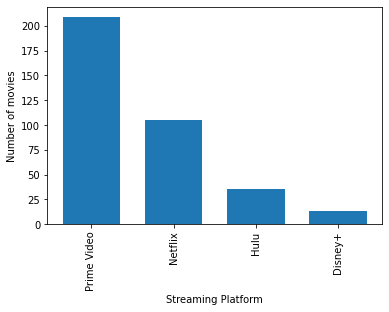

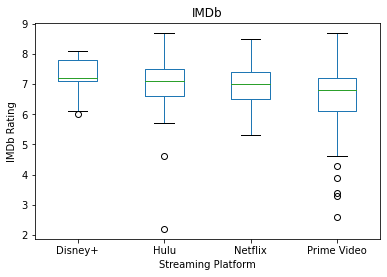

In [41]:
biography_df = genre_df.loc[genre_df['Genres']=='Biography']
biography_df 

streaming_service_bio = biography_df['Service'].value_counts()
x_value = streaming_service_bio.index.values  
y_value= streaming_service_bio.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90) 
plt.xlabel('Streaming Platform')
plt.ylabel('Number of movies')



biography_df.boxplot(by='Service', column=['IMDb'],grid = False)
plt.xlabel('Streaming Platform')
plt.ylabel('IMDb Rating')
plt.suptitle("")
                               


In [42]:
biography_df[['Title','IMDb']][0:11]

,Title,IMDb
6822,GoodFellas,8.7
13634,Hearing Is Believing,8.7
26,Senna,8.5
13649,Mahanati,8.5
40,Dangal,8.4
42,Harishchandrachi Factory,8.4
13684,The Conscientious Objector,8.3
13685,The Look of Silence,8.3
13693,Temple Grandin,8.3
13703,Downfall,8.2


Text(0.5, 0.98, '')

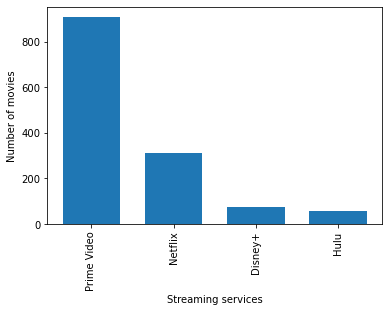

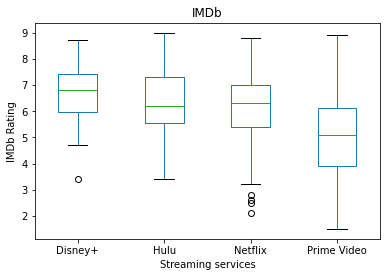

In [43]:
action_df = genre_df.loc[genre_df['Genres']=='Action']


streaming_service_action = action_df['Service'].value_counts()
x_value = streaming_service_action.index.values  
y_value= streaming_service_action.values
plt.xlabel('Streaming services')
plt.ylabel('Number of movies')


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  



action_df.boxplot(by='Service', column=['IMDb'],grid = False)
plt.xlabel('Streaming services')
plt.ylabel('IMDb Rating')
plt.suptitle("")
                               


In [44]:
action_df[['Title','IMDb']][0:11]

,Title,IMDb
6812,The Dark Knight,9.0
13625,The Mountain II,8.9
6,Inception,8.8
10,The Matrix,8.7
20447,Star Wars: The Empire Strikes Back,8.7
20457,Star Wars: A New Hope,8.6
32,Avengers: Infinity War,8.5
40,Dangal,8.4
13665,Rangasthalam,8.4
48,Spider-Man: Into the Spider-Verse,8.4


Text(0.5, 0.98, '')

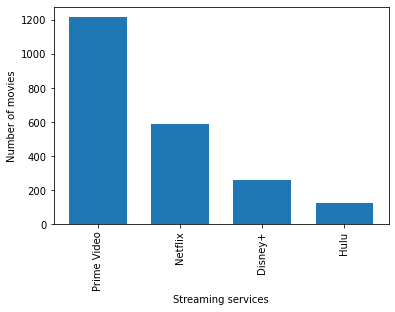

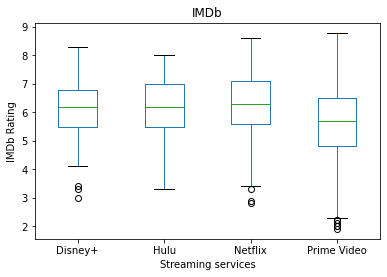

In [45]:
comedy_df = genre_df.loc[genre_df['Genres']=='Comedy']

comedy_df[['Title','IMDb']][0:10] 


streaming_service_comedy = comedy_df['Service'].value_counts()
x_value = streaming_service_comedy.index.values  
y_value=streaming_service_comedy.values
plt.xlabel('Streaming services')
plt.ylabel('Number of movies')


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  



comedy_df.boxplot(by='Service', column=['IMDb'],grid = False)
plt.xlabel('Streaming services')
plt.ylabel('IMDb Rating')
plt.suptitle("")
                               


In [46]:
comedy_df[['Title','IMDb']][0:11]

,Title,IMDb
13627,Memories 677,8.8
15,Luciano Mellera: Infantiloide,8.6
13641,Louis C.K.: Shameless,8.6
13642,George Carlin: You Are All Diseased,8.6
13650,Bey Yaar,8.5
33,Back to the Future,8.5
34,Dave Chappelle: Sticks & Stones,8.5
35,Bo Burnham: What.,8.5
42,Harishchandrachi Factory,8.4
13666,Jaane Bhi Do Yaaro,8.4


Text(0.5, 0.98, '')

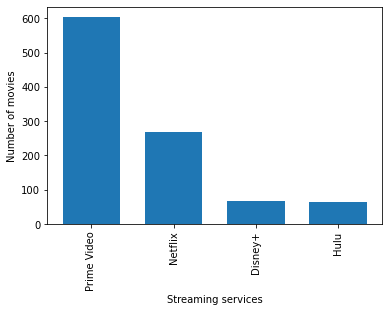

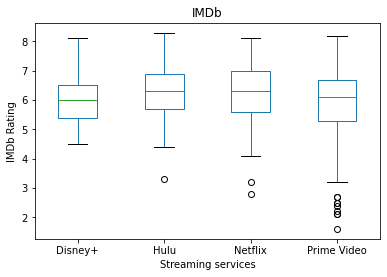

In [47]:
romance_df = genre_df.loc[genre_df['Genres']=='Romance']
romance_df 

streaming_service_romance = romance_df ['Service'].value_counts()
x_value = streaming_service_romance.index.values  
y_value= streaming_service_romance.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  
plt.xlabel('Streaming services')
plt.ylabel('Number of movies')



romance_df.boxplot(by='Service', column=['IMDb'],grid = False)
plt.xlabel('Streaming services')
plt.ylabel('IMDb Rating')
plt.suptitle("")
                               

In [48]:
romance_df[['Title','IMDb']][0:11]

,Title,IMDb
6881,Good Will Hunting,8.3
6896,Portrait of a Lady on Fire,8.2
13717,Arjun Reddy,8.2
13719,Amar Prem,8.2
136,Barfi!,8.1
138,Dil Chahta Hai,8.1
13762,Dilwale Dulhania Le Jayenge,8.1
13763,Padosan,8.1
20598,The Princess Bride,8.1
176,Kal Ho Naa Ho,8.0


Text(0.5, 0.98, '')

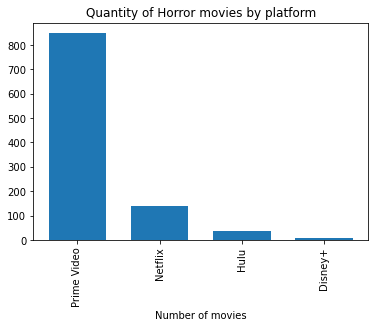

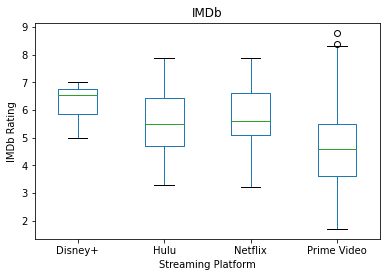

In [49]:
horror_df = genre_df.loc[genre_df['Genres']=='Horror']
horror_df 

streaming_service_horror = horror_df ['Service'].value_counts()
x_value = streaming_service_horror.index.values  
y_value= streaming_service_horror.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)  
plt.title('Quantity of Horror movies by platform')
plt.xlabel('Streaming Platform')
plt.xlabel('Number of movies')


horror_df.boxplot(by='Service', column=['IMDb'],grid = False)
plt.xlabel('Streaming Platform')
plt.ylabel('IMDb Rating')                               
plt.suptitle("")

In [50]:
horror_df[['Title','IMDb']][0:11]

,Title,IMDb
13627,Memories 677,8.8
13679,Blood Relative,8.4
13694,Blood Brother,8.3
13751,The Cabinet of Dr. Caligari,8.1
13829,Rosemary's Baby,8.0
245,Berserk: The Golden Age Arc III - The Advent,7.9
7062,Let the Right One In,7.9
13886,Night of the Living Dead,7.9
303,Berserk: The Golden Age Arc II - The Battle fo...,7.8
420,I See You,7.7


Text(0.5, 0.98, '')

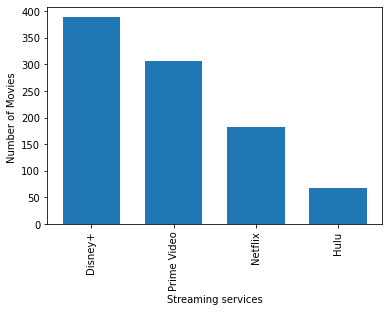

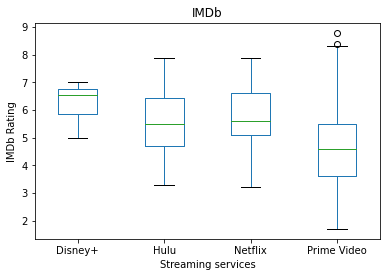

In [51]:
family_df = genre_df.loc[genre_df['Genres']=='Family']
family_df 

streaming_service_family = family_df['Service'].value_counts()
x_value = streaming_service_family.index.values  
y_value= streaming_service_family.values


plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90) 
plt.xlabel('Streaming services')
plt.ylabel('Number of Movies ')


horror_df.boxplot(by='Service', column=['IMDb'],grid = False)
title='IMDB Rating by platiform'
plt.xlabel('Streaming services')
plt.ylabel('IMDb Rating')
plt.suptitle("")

In [52]:
family_df[['Title','IMDb']][0:11]

,Title,IMDb
13622,Finding Family,9.1
13634,Hearing Is Believing,8.7
13640,It's a Wonderful Life,8.6
13650,Bey Yaar,8.5
20464,The Lion King,8.5
41,Like Stars on Earth,8.4
48,Spider-Man: Into the Spider-Verse,8.4
20493,WALL·E,8.4
20494,Coco,8.4
20510,Toy Story,8.3


## Let's dive even more...

In [53]:
platforms.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [57]:
#Create platforms column to see in how many platforms each movie is.
platforms["Platforms"]=platforms["Netflix"]+platforms["Hulu"]+platforms["Prime Video"]+platforms["Disney+"]
platforms.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0,2


In [58]:
#How many movies are in only one platform.
uniquePlatform=platforms["Platforms"]==1
uniquePlatform

0         True
1         True
2         True
3         True
4        False
         ...  
16726     True
16727     True
16737     True
16738     True
16740     True
Name: Platforms, Length: 7192, dtype: bool

In [59]:
#Insert previous code into a new dataframe
uniqueDF=platforms[uniquePlatform]
uniqueDF.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,1


In [60]:
#Sum of each platform to print unique movies

In [61]:
Netflix=uniqueDF["Netflix"].sum()
Netflix

1450

In [62]:
Hulu=uniqueDF["Hulu"].sum()
Hulu

381

In [63]:
Prime=uniqueDF["Prime Video"].sum()
Prime

4508

In [64]:
Disney=uniqueDF["Disney+"].sum()
Disney

472

In [65]:
Total=uniqueDF["Platforms"].sum()
Total

6811

In [66]:
#Shape to compare
uniqueDF.shape

(6811, 14)

In [67]:
#Dataframe to insert unique movie sums
uniqueSum={'Platform':  ['Netflix', 'Hulu', 'PrimeVideo','Disney+'],
        'TotalUniqueContent': [Netflix,Hulu,Prime,Disney]
        }
uniqueSumDf = pd.DataFrame(uniqueSum, columns = ['Platform', 'TotalUniqueContent'],index=uniqueSum['Platform'])

uniqueSumDf

,Platform,TotalUniqueContent
Netflix,Netflix,1450
Hulu,Hulu,381
PrimeVideo,PrimeVideo,4508
Disney+,Disney+,472


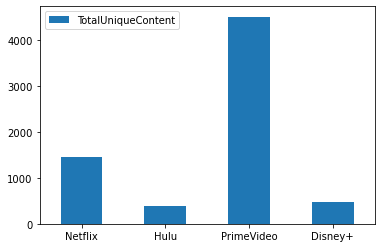

In [68]:
#Plot sums
ax = uniqueSumDf.plot.bar(rot=0)

## We'll now see how each genre populates each platform

In [69]:
#NETFLIX
onlyNetflix=uniqueDF["Netflix"]==1
onlyNetflixDf=uniqueDF[onlyNetflix]
#HULU
onlyHulu=uniqueDF["Hulu"]==1
onlyHuluDf=uniqueDF[onlyHulu]
#PRIME VIDEO
onlyPrime=uniqueDF["Prime Video"]==1
onlyPrimeDf=uniqueDF[onlyPrime]
#DISNEY+
onlyDisney=uniqueDF["Disney+"]==1
onlyDisneyDf=uniqueDF[onlyDisney]

In [70]:
#show info e.g. Prime
onlyPrimeDf.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
4439,4440,It's a Wonderful Life,1946,7+,8.6,0,0,1,0,"Drama,Family,Fantasy",United States,"English,French",130.0,1
4440,4441,Downfall,2004,18+,8.2,0,0,1,0,"Biography,Drama,History,War","Germany,Austria,Italy","French,English,German,Russian",156.0,1
4442,4443,Airplane!,1980,7+,7.7,0,0,1,0,Comedy,United States,English,88.0,1
4445,4446,Rosemary's Baby,1968,18+,8.0,0,0,1,0,"Drama,Horror",United States,English,137.0,1
4446,4447,Amores Perros,2000,18+,8.1,0,0,1,0,"Drama,Thriller",Mexico,Spanish,154.0,1


In [71]:
#Separate every genre by ","
#NETFLIX
genresNetflix = pd.DataFrame(onlyNetflixDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresNetflix = genresNetflix.reset_index(drop = True)  

#HULU
genresHulu = pd.DataFrame(onlyHuluDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresHulu = genresHulu.reset_index(drop = True)  

#PRIME
genresPrime = pd.DataFrame(onlyPrimeDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresPrime = genresPrime.reset_index(drop = True)  

#DISNEY
genresDisney = pd.DataFrame(onlyDisneyDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresDisney = genresDisney.reset_index(drop = True)

#TOTAL
genresTotal = pd.DataFrame(uniqueDF.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresTotal = genresTotal.reset_index(drop = True)

In [72]:
#Show results
genresTotal

,genre
0,Action
1,Adventure
2,Sci-Fi
3,Thriller
4,Action
...,...
17909,Adventure
17910,Family
17911,Comedy
17912,Family


In [77]:
#NETFLIX
genre_count_Netflix = pd.DataFrame(genresNetflix.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Netflix.sort_values(by="count",ascending=False)

#HULU
genre_count_Hulu = pd.DataFrame(genresHulu.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Hulu.sort_values(by="count",ascending=False)

#PRIME
genre_count_Prime = pd.DataFrame(genresPrime.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Prime.sort_values(by="count",ascending=False)

#DISNEY
genre_count_Disney = pd.DataFrame(genresDisney.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Disney.sort_values(by="count",ascending=False)

#Total
genre_count_Total = pd.DataFrame(genresTotal.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Total.sort_values(by="count",ascending=False)

df_merge=pd.merge(genre_count_Total,genre_count_Netflix,on="genre",how="outer", suffixes=("_Total","_Netflix"))
df_merge2=pd.merge(df_merge,genre_count_Hulu,on="genre",how="outer",suffixes=("_1","_Hulu"))
df_merge3=pd.merge(df_merge2,genre_count_Prime,on="genre",how="outer")
df_merge4=pd.merge(df_merge3,genre_count_Disney,on="genre",how="outer")

sortedGenres = df_merge4.sort_values(by="count_Total",ascending=False)

sortedGenres.head()

,count_Total,count_Netflix,count_x,count_y,count
genre,,,,,
Drama,3119,662.0,190.0,2131,136.0
Comedy,2191,589.0,126.0,1217,259.0
Thriller,1655,337.0,85.0,1220,13.0
Action,1353,313.0,56.0,908,76.0
Horror,1035,140.0,38.0,849,8.0


In [79]:
#Changing column names...
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
sortedGenres.rename(columns={"count_Total":"Total", "count_Netflix":"Netflix Count", "count_x": "Hulu Count", 
                             "count_y": "Prime Count", "count": "Disney+ Count"}, inplace=True)

sortedGenres.head()

,Total,Netflix Count,Hulu Count,Prime Count,Disney+ Count
genre,,,,,
Drama,3119,662.0,190.0,2131,136.0
Comedy,2191,589.0,126.0,1217,259.0
Thriller,1655,337.0,85.0,1220,13.0
Action,1353,313.0,56.0,908,76.0
Horror,1035,140.0,38.0,849,8.0


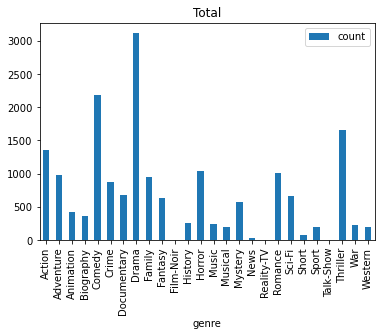

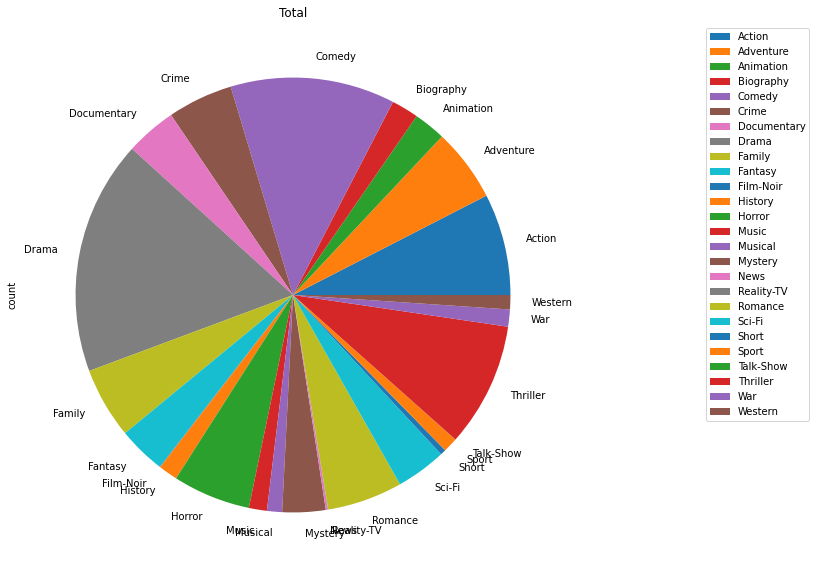

In [80]:
TotalPlot = genre_count_Total.plot.bar(rot=90)
plt.title("Total")
TotalPlot = genre_count_Total.plot.pie(subplots=True,figsize=(10,10))
plt.title("Total")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

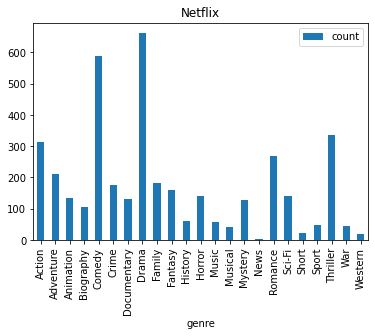

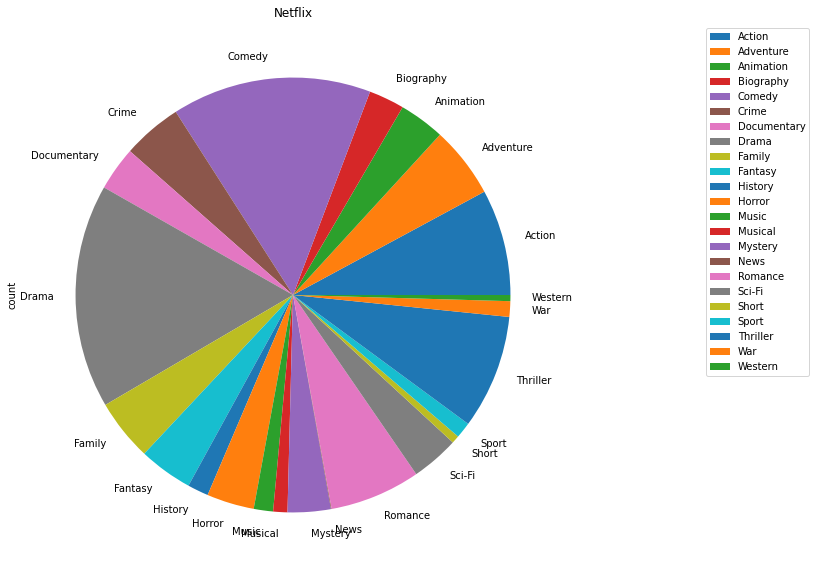

In [81]:
netflixPlot = genre_count_Netflix.plot.bar(rot=90)
plt.title("Netflix")
netflixPlot = genre_count_Netflix.plot.pie(subplots=True,figsize=(10,10))
plt.title("Netflix")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

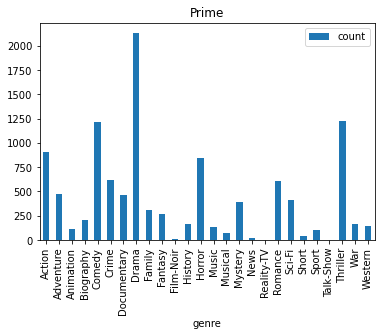

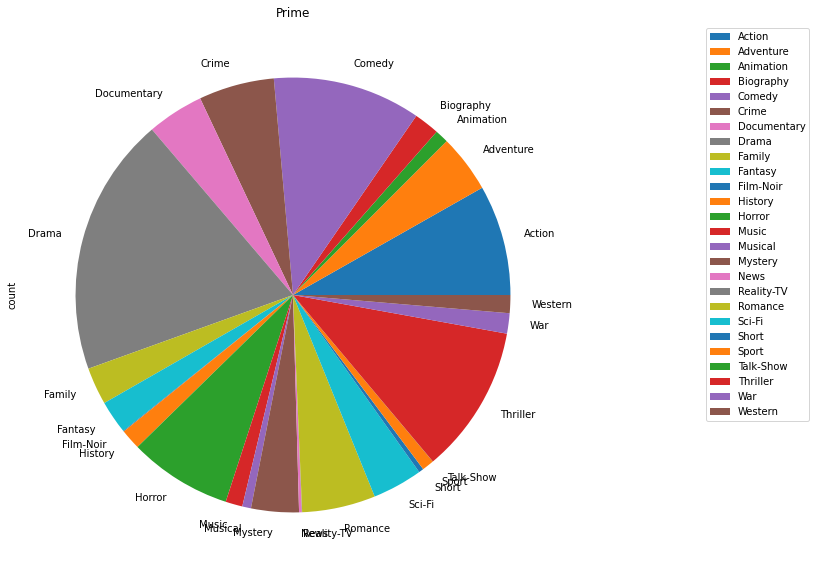

In [82]:
primePlot = genre_count_Prime.plot.bar(rot=90)
plt.title("Prime")
primePlot = genre_count_Prime.plot.pie(subplots=True,figsize=(10,10))
plt.title("Prime")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

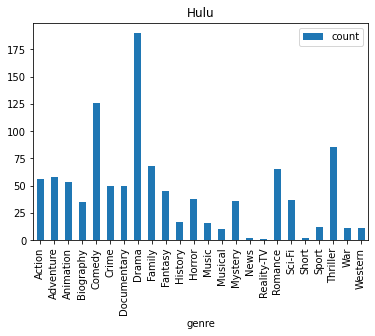

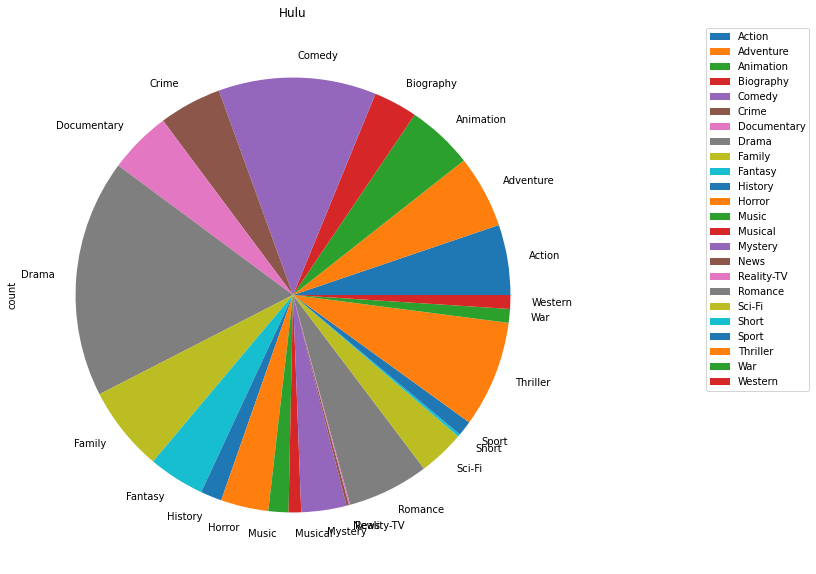

In [83]:
huluPlot = genre_count_Hulu.plot.bar(rot=90)
plt.title("Hulu")
huluPlot = genre_count_Hulu.plot.pie(subplots=True,figsize=(10,10))
plt.title("Hulu")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

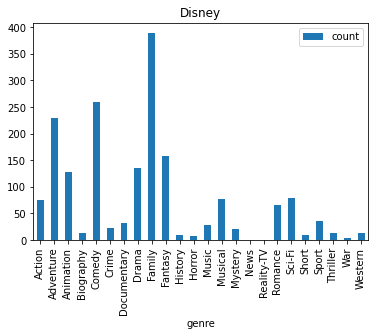

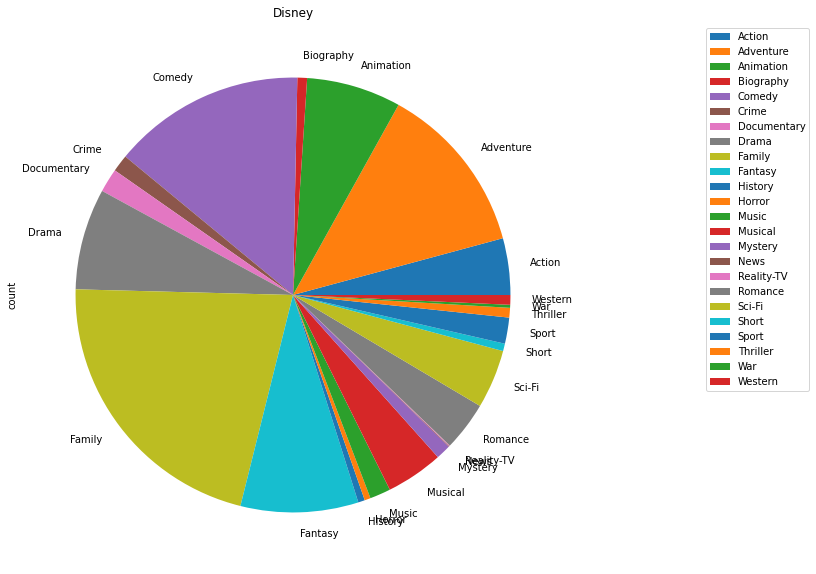

In [84]:
disneyPlot = genre_count_Disney.plot.bar(rot=90)
plt.title("Disney")
disneyPlot = genre_count_Disney.plot.pie(subplots=True,figsize=(10,10))
plt.title("Disney")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")